## _Time Series Analysis_ pada Data GDELT

### Data

Data yang digunakan adalah data _average Tone_ dari pembeitaan tentang _global warming_ yang bersumber pada GDELT.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gw = pd.read_excel('Data_Master.xlsx', 'Global Warming')
pa = pd.read_excel('Data_Master.xlsx', 'Penyebab Alami')
pi = pd.read_excel('Data_Master.xlsx', 'Perubahan Iklim')
mi = pd.read_excel('Data_Master.xlsx', 'Mitigasi')
pe = pd.read_excel('Data_Master.xlsx', 'Penyakit')
full = pd.read_excel('Data_Master.xlsx', 'FULL')

In [3]:
gw

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,content
0,760690147,2018-06-01,201806,2018,2018.4137,BUS,INDUSTRY,NaN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
1,760690148,2018-06-01,201806,2018,2018.4137,BUS,INDUSTRY,NaN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
2,760691450,2018-06-01,201806,2018,2018.4137,IDN,INDONESIAN,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
3,760691451,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
4,760691455,2018-06-01,201806,2018,2018.4137,IDNBUS,INDONESIAN,IDN,NaN,NaN,...,"Jakarta, Jakarta Raya, Indonesia",ID,ID04,-6.17444,106.829,-2679652,20180601,http://www.jcnnewswire.com/pressrelease/43825/...,Eight National Banks and WWF-Indonesia Launch ...,Eight National Banks and WWF-Indonesia Launch ...
5,760745173,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,Indonesia,ID,ID,-5.00000,120.000,ID,20180601,https://energy.economictimes.indiatimes.com/ne...,South Korea's sulphur cap alters Asian coal ma...,"By Clyde RussellLAUNCESTON, Australia: South K..."
6,760745174,2018-06-01,201806,2018,2018.4137,IDN,INDONESIA,IDN,NaN,NaN,...,Indonesia,ID,ID,-5.00000,120.000,ID,20180601,https://energy.economictimes.indiatimes.com/ne...,South Korea's sulphur cap alters Asian coal ma...,"By Clyde RussellLAUNCESTON, Australia: South K..."
7,760747530,2018-06-01,201806,2018,2018.4137,IDN,INDONESIAN,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...
8,760747534,2018-06-01,201806,2018,2018.4137,IDNGOV,INDONESIAN,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...
9,760747535,2018-06-01,201806,2018,2018.4137,IDNGOV,INDONESIA,IDN,NaN,NaN,...,"Mount Merapi, Indonesia (general), Indonesia",ID,ID00,-7.54056,110.447,-2687821,20180601,https://www.channelnewsasia.com/news/asia/indo...,Indonesian authorities issue flight warning as...,JAKARTA: Indonesia raised the flight warning a...


In [4]:
df = gw[['SQLDATE','AvgTone']]

In [8]:
data = df.groupby(('SQLDATE')).mean()

In [13]:
data = data[:133]

In [14]:
data.tail()

,AvgTone
SQLDATE,
2018-10-13,-0.368189
2018-10-14,-0.665216
2018-10-15,-0.663325
2018-10-16,-1.977216
2018-10-17,1.985981


In [15]:
data.count()

AvgTone    133
dtype: int64

Data yang digunakan sebanyak 136 data (n=136) dan berada pada rentang waktu 01 Juni 2018 sampai dengan 17 Oktober 2018.

### Pengecekan data yang hilang

Sebelum melakukan analisis data, dilakukan pengecekan data apakah terdapat _missing value_ (data hilang) atau tidak. Data yang tidak lengkap akan menyebabkan akurasi analisis yang kurang baik.

In [16]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,AvgTone
Total,0.0
Percent,0.0


Berdasarkan pengecekan yang telah dilakukan jelas bahwa data lengkap (tidak ada missing value)

### Plot Data _Time Series_

Dalam memilih suatu metode _time series_ (runtun waktu) yang tepat adalah dengan mempertimbangkan pola data, sehingga metode yang paling tepat dengan pola tersebut dapat diuji.

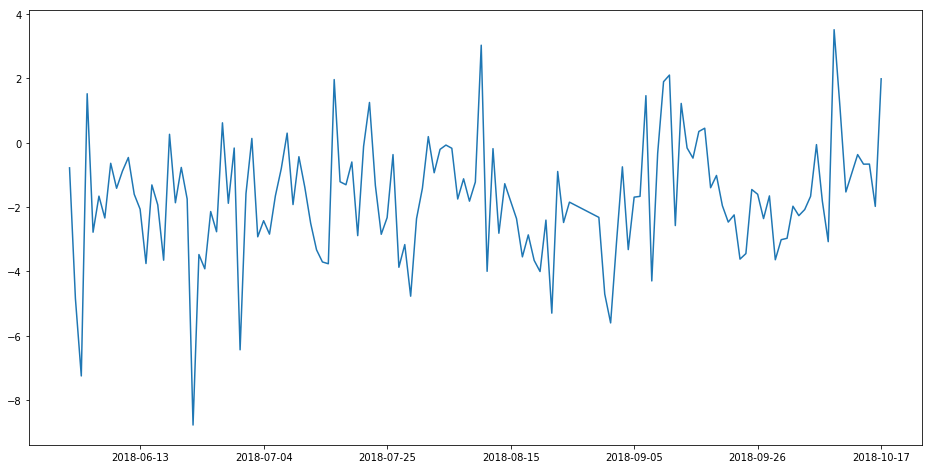

In [17]:
plt.figure(figsize=(16,8))
plt.plot(data['AvgTone'])

Nampak bahwa data observasi berubah-ubah sekitar tingkatan atau rata-rata yang konstan disebut pola horizontal. Tipe ini pada data runtun waktu disebut stationer dalam rata-rata. Data stasioner didefinisikan sebagai data yang  nilai  rata-ratanya tidak berubah dari waktu ke waktu atau dapat dikatakan data bersifat stabil.

Teknik yang bisa digunakan apabila data stasioner:
1.	_Naïve_,
2.	_Simple averaging_,
3.	_Moving average methods_,
4.	_Autoregressive integratrred moving average_ (_ARIMA_).

Dalam penelitian ini digunakan metode _ARIMA_.

### _ARIMA_ (_Auto Regressive Integrated Moving Average_)

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings; warnings.simplefilter('ignore')

from __future__ import absolute_import, division, print_function

import sys
import os

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Membuat data training dan data test

In [21]:
data.count()

AvgTone    133
dtype: int64

In [22]:
n_train = int(0.95*133)+1
n_forecast = 133 - n_train

data_train = data.iloc[:n_train]['AvgTone']
data_test = data.iloc[n_train:]['AvgTone']

In [23]:
print(data_train.shape)
print(data_test.shape)

(127,)
(6,)


In [24]:
print("Training Series:", "\n", data_train.tail(),"\n")
print("Testing Series:", "\n", data_test.head())

Training Series: 
 SQLDATE
2018-10-06   -0.05788
2018-10-07   -1.81462
2018-10-08   -3.07324
2018-10-09    3.51234
2018-10-10    1.09680
Name: AvgTone, dtype: float64 

Testing Series: 
 SQLDATE
2018-10-11   -1.52889
2018-10-13   -0.36819
2018-10-14   -0.66522
2018-10-15   -0.66332
2018-10-16   -1.97722
Name: AvgTone, dtype: float64


In [25]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    data_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=data_ax)
    data_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return data_ax, acf_ax, pacf_ax

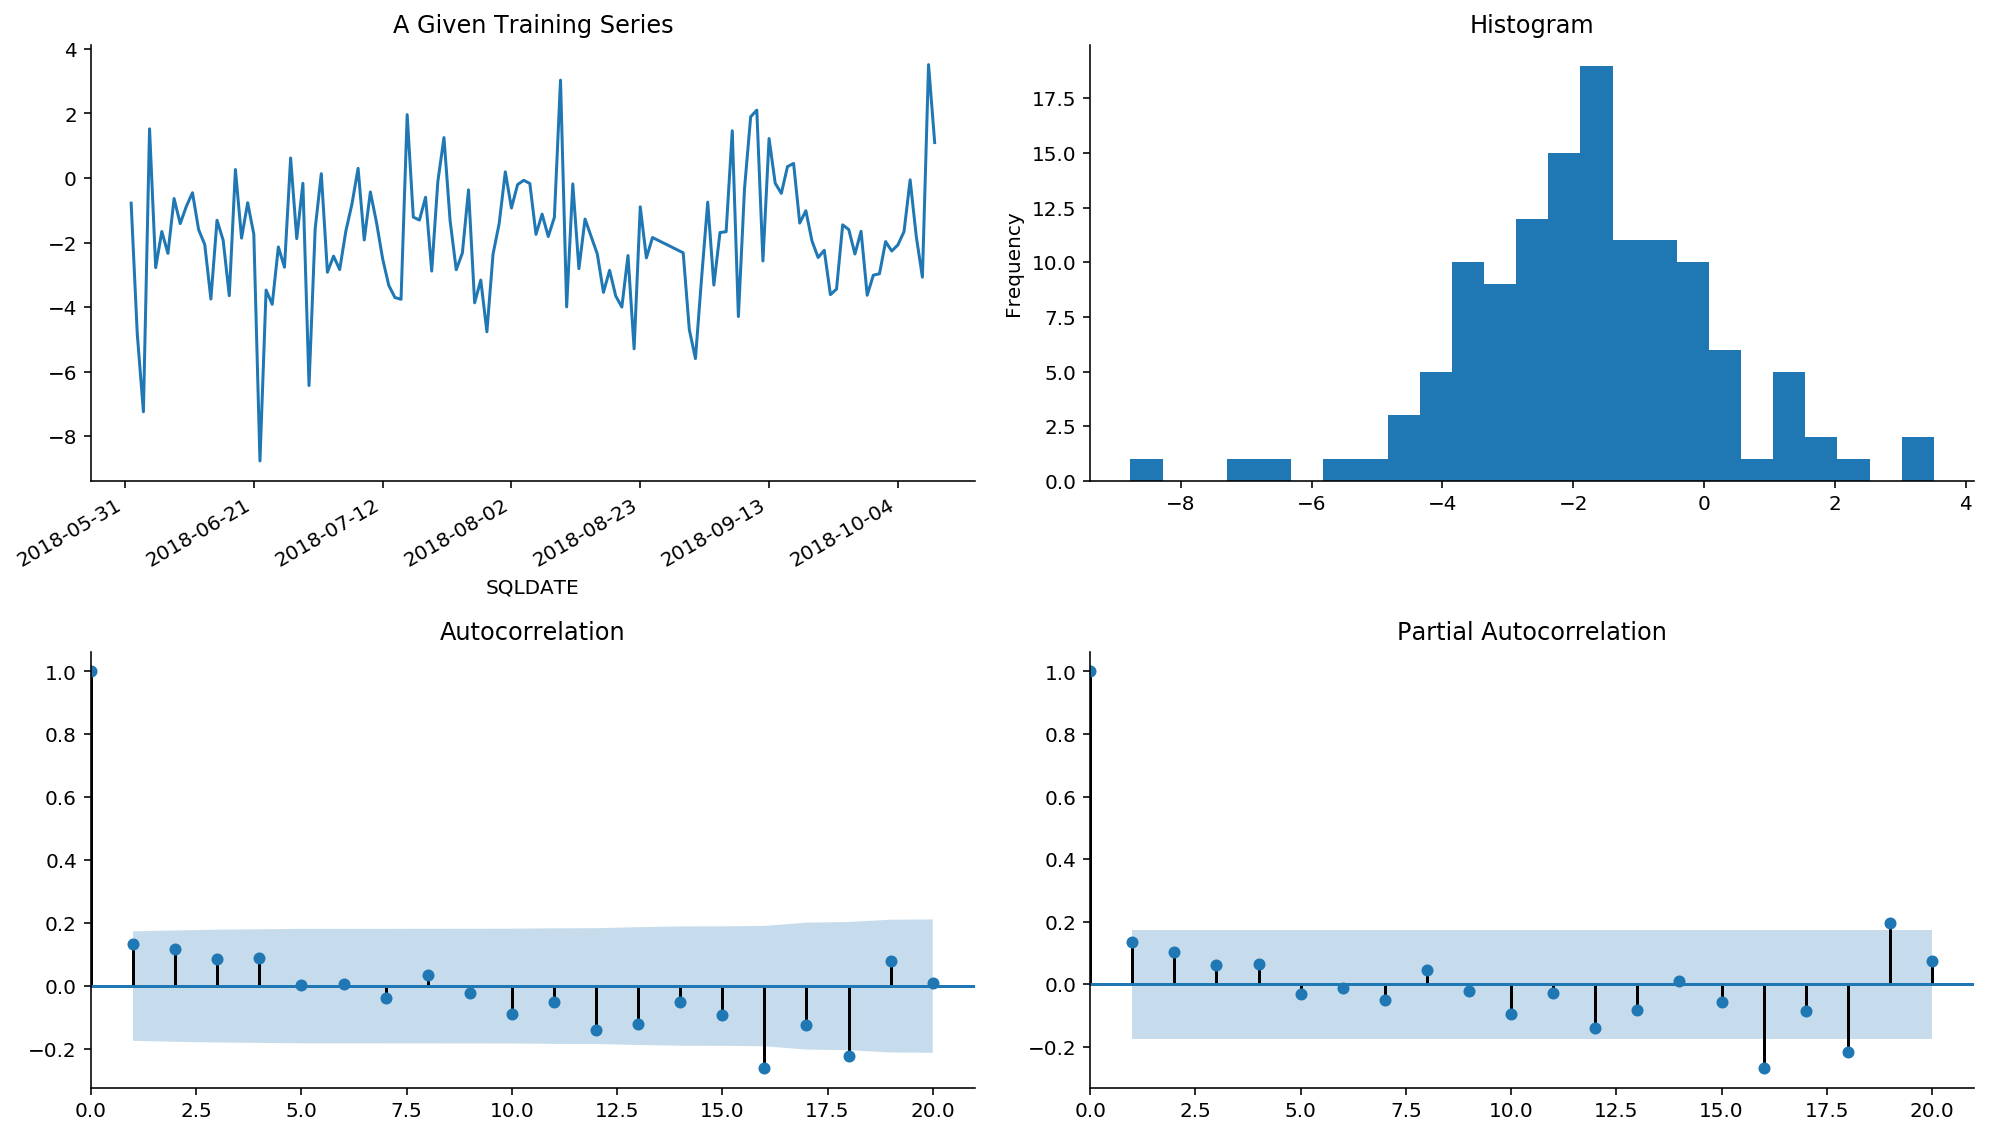

In [27]:
tsplot(data_train, title='A Given Training Series', lags=20);

In [28]:
arima200 = sm.tsa.SARIMAX(data_train, order=(2,0,0))
model_results = arima200.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                AvgTone   No. Observations:                  127
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -271.190
Date:                Tue, 27 Nov 2018   AIC                            548.379
Time:                        19:02:53   BIC                            556.912
Sample:                             0   HQIC                           551.846
                                - 127                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3488      0.083      4.183      0.000       0.185       0.512
ar.L2          0.3615      0.099      3.655      0.000       0.168       0.555
sigma2         4.1697      0.376     11.080      0.000       3.432       4.907
===================================================================================
Ljung-Box (Q):                       47.98   Jarque-Bera (JB):                24.91
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.03
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Cari lebih dari beberapa model menggunakan petunjuk visual di atas sebagai titik awal

In [30]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = sm.tsa.SARIMAX(data_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

Text(0.5,1,'BIC')

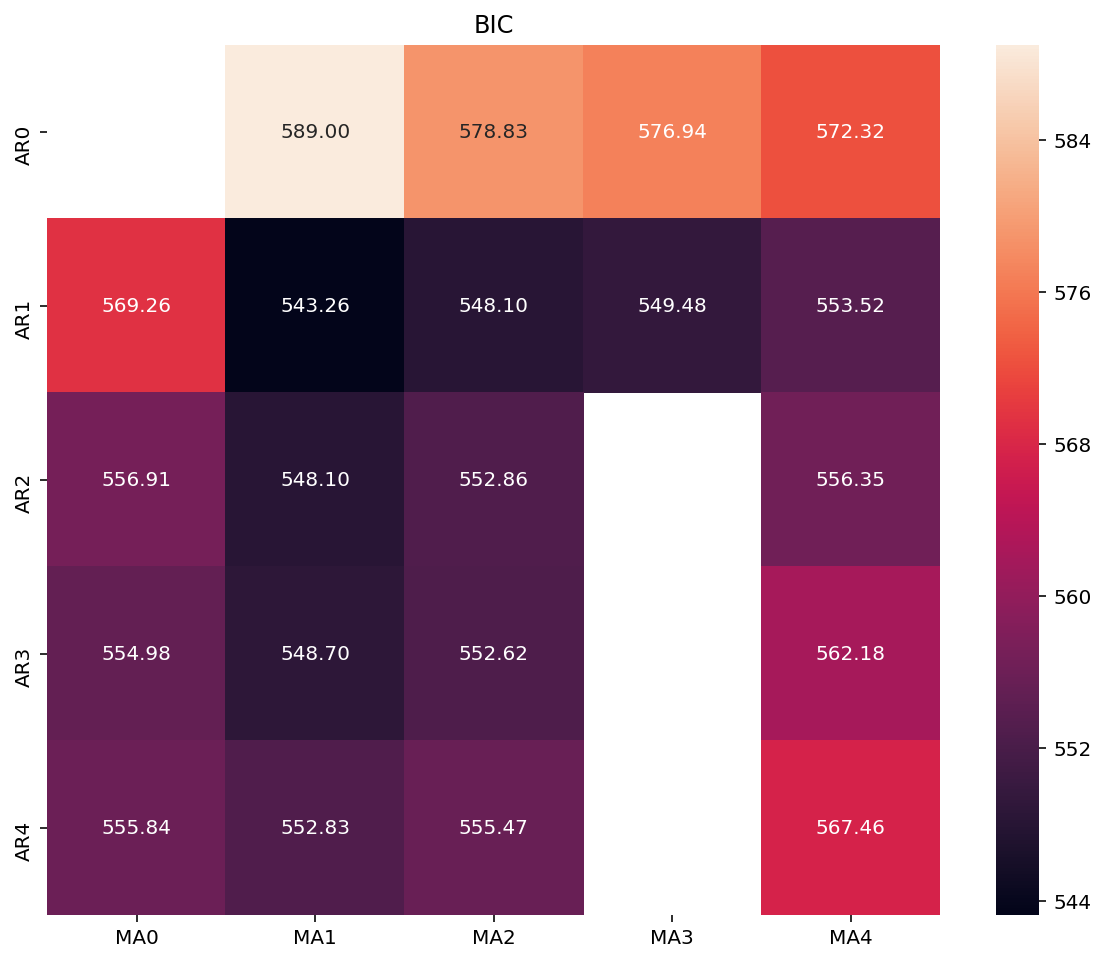

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(results_bic, 
                 mask = results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f')
ax.set_title('BIC')

### Metode pemilihan model alternatif, terbatas hanya mencari parameter AR dan MA

In [32]:
train_results = sm.tsa.arma_order_select_ic(data_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC (3, 1)
BIC (1, 1)


### _Model Diagnostic Checking_

Residual dari model dihitung sebagai perbedaan antara nilai aktual dan nilai yang _fitted_: $ e_i = y_i - \hat{y_i}$. etiap residu adalah komponen observasi yang tidak dapat diprediksi.

Ketika data merupakan _time series_, harus melihat plot ACF residual. Plot ACF residual akan memperlihatkan jika ada autokorelasi di residual (menunjukkan bahwa ada informasi yang belum diperhitungkan dalam model).

**Outliers** menunjukkan ada sesuatu yang tidak biasa terjadi. Akan sangat berharga untuk menyelidiki pencilan itu untuk melihat apakah ada keadaan atau kejadian yang tidak biasa.

Histogram: baik untuk memeriksa apakah residu terdistribusi secara normal. Seperti yang dijelaskan sebelumnya, ini tidak penting untuk meramalkan, tetapi itu membuat perhitungan interval prediksi jauh lebih mudah.

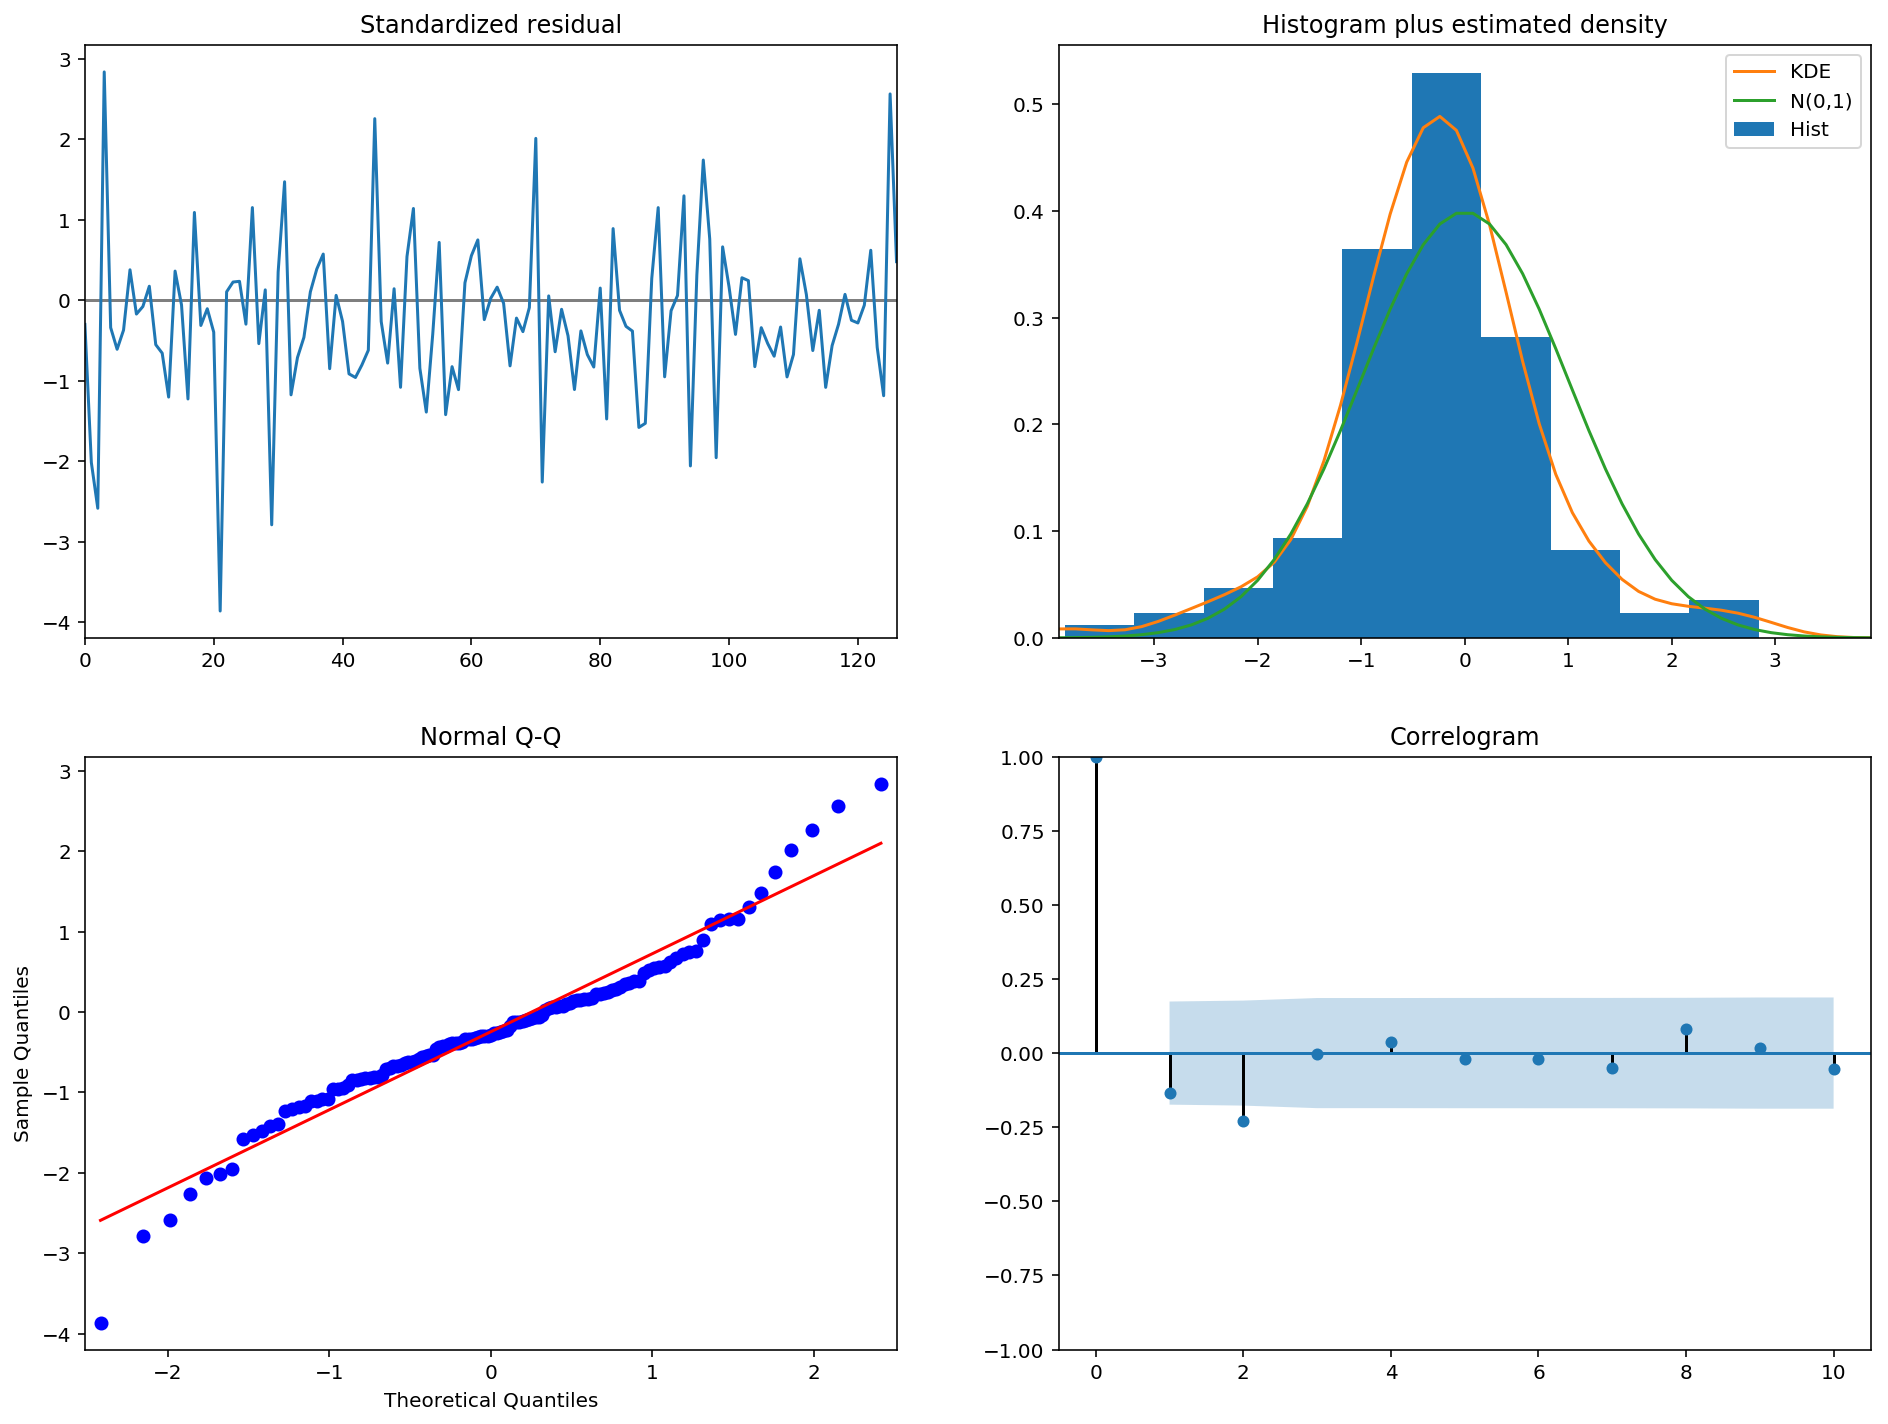

In [33]:
model_results.plot_diagnostics(figsize=(16, 12));

### _Formal testing_

In [34]:
het_method='breakvar'
norm_method='jarquebera'
sercor_method='ljungbox'

(het_stat, het_p) = model_results.test_heteroskedasticity(het_method)[0]
norm_stat, norm_p, skew, kurtosis = model_results.test_normality(norm_method)[0]
sercor_stat, sercor_p = model_results.test_serial_correlation(method=sercor_method)[0]
sercor_stat = sercor_stat[-1] # last number for the largest lag
sercor_p = sercor_p[-1] # last number for the largest lag

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.
# Essentially, below 1 or above 3 is bad.
dw = sm.stats.stattools.durbin_watson(model_results.filter_results.standardized_forecasts_error[0, model_results.loglikelihood_burn:])

# check whether roots are outside the unit circle (we want them to be);
# will be True when AR is not used (i.e., AR order = 0)
arroots_outside_unit_circle = np.all(np.abs(model_results.arroots) > 1)
# will be True when MA is not used (i.e., MA order = 0)
maroots_outside_unit_circle = np.all(np.abs(model_results.maroots) > 1)

print('Test heteroskedasticity of residuals ({}): stat={:.3f}, p={:.3f}'.format(het_method, het_stat, het_p));
print('\nTest normality of residuals ({}): stat={:.3f}, p={:.3f}'.format(norm_method, norm_stat, norm_p));
print('\nTest serial correlation of residuals ({}): stat={:.3f}, p={:.3f}'.format(sercor_method, sercor_stat, sercor_p));
print('\nDurbin-Watson test on residuals: d={:.2f}\n\t(NB: 2 means no serial correlation, 0=pos, 4=neg)'.format(dw))
print('\nTest for all AR roots outside unit circle (>1): {}'.format(arroots_outside_unit_circle))
print('\nTest for all MA roots outside unit circle (>1): {}'.format(maroots_outside_unit_circle))


Test heteroskedasticity of residuals (breakvar): stat=0.641, p=0.154

Test normality of residuals (jarquebera): stat=24.906, p=0.000

Test serial correlation of residuals (ljungbox): stat=47.984, p=0.181

Durbin-Watson test on residuals: d=2.13
	(NB: 2 means no serial correlation, 0=pos, 4=neg)

Test for all AR roots outside unit circle (>1): True

Test for all MA roots outside unit circle (>1): True


### Model Performance Evaluation (in-sample fit) 

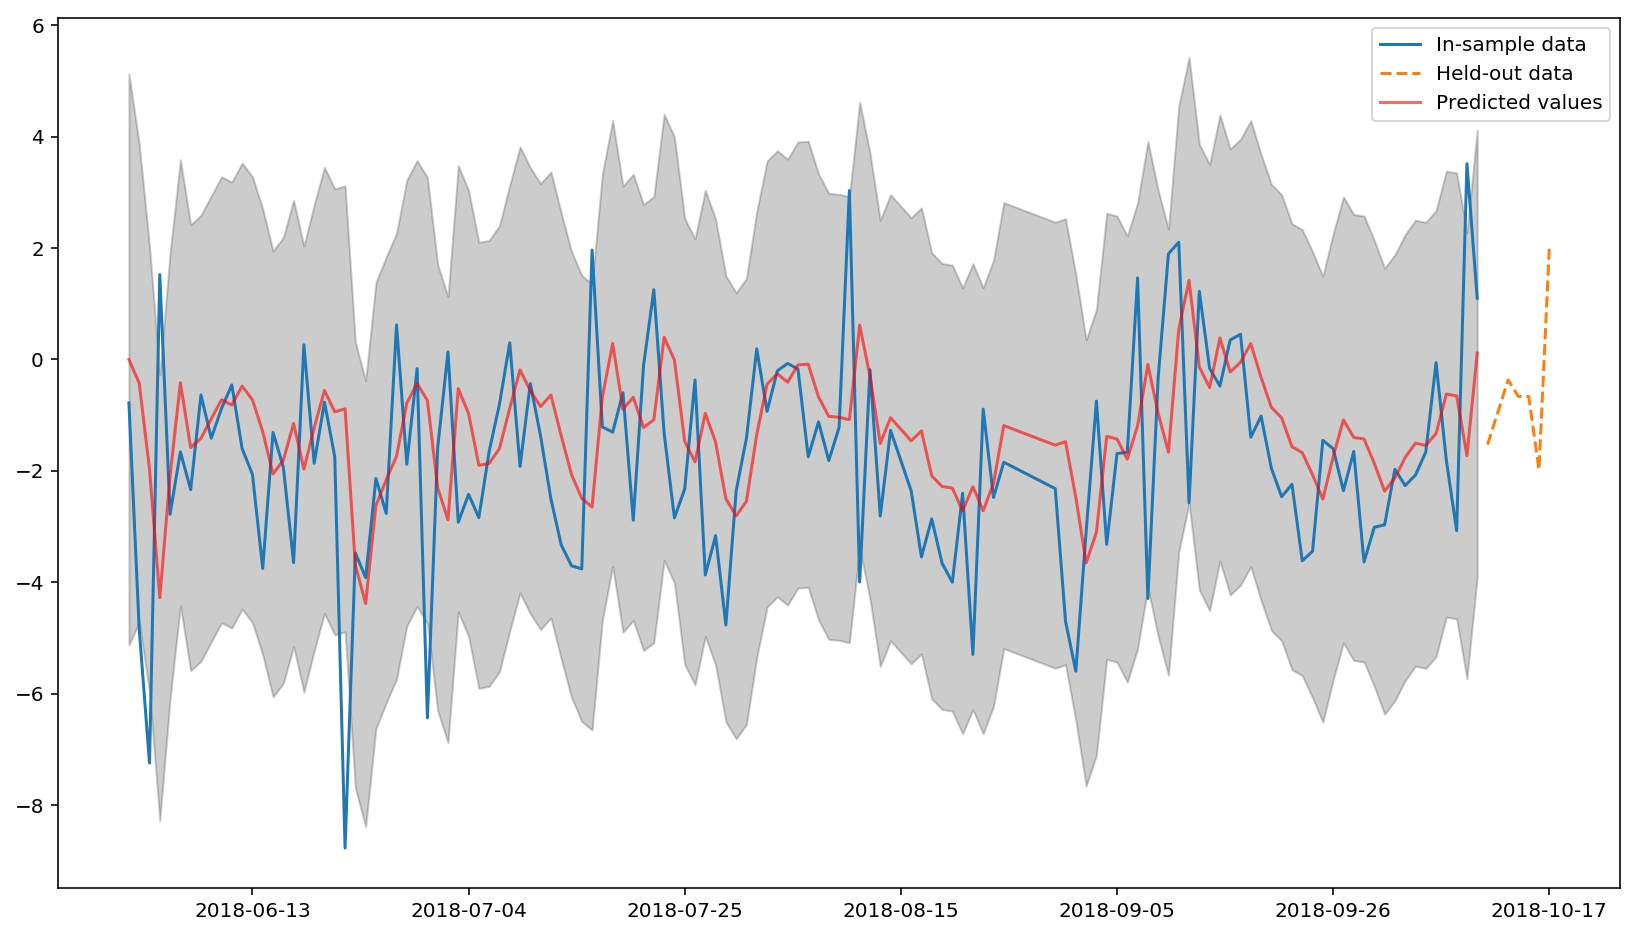

In [36]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
    
ax1.plot(data_train, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(data_test, label='Held-out data', linestyle='--')

# yes DatetimeIndex
pred_begin = data_train.index[model_results.loglikelihood_burn]
pred_end = data_test.index[-1]
pred = model_results.get_prediction()
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

In [37]:
data['AvgTone'][100:127]

SQLDATE
2018-09-14   -0.16158
2018-09-15   -0.47771
2018-09-16    0.34981
2018-09-17    0.45132
2018-09-18   -1.39755
2018-09-19   -1.01664
2018-09-20   -1.95424
2018-09-21   -2.46521
2018-09-22   -2.24166
2018-09-23   -3.61503
2018-09-24   -3.44364
2018-09-25   -1.45262
2018-09-26   -1.60107
2018-09-27   -2.35621
2018-09-28   -1.65170
2018-09-29   -3.63521
2018-09-30   -3.01199
2018-10-01   -2.96882
2018-10-02   -1.97184
2018-10-03   -2.26483
2018-10-04   -2.07561
2018-10-05   -1.66364
2018-10-06   -0.05788
2018-10-07   -1.81462
2018-10-08   -3.07324
2018-10-09    3.51234
2018-10-10    1.09680
Name: AvgTone, dtype: float64

In [42]:
pred = model_results.get_prediction(start=100, end=126)

In [43]:
pred.predicted_mean

SQLDATE
2018-09-14   -0.50427
2018-09-15    0.38528
2018-09-16   -0.22503
2018-09-17   -0.05070
2018-09-18    0.28389
2018-09-19   -0.32428
2018-09-20   -0.85986
2018-09-21   -1.04916
2018-09-22   -1.56636
2018-09-23   -1.67313
2018-09-24   -2.07132
2018-09-25   -2.50806
2018-09-26   -1.75166
2018-09-27   -1.08361
2018-09-28   -1.40066
2018-09-29   -1.42795
2018-09-30   -1.86507
2018-10-01   -2.36481
2018-10-02   -2.12443
2018-10-03   -1.76109
2018-10-04   -1.50284
2018-10-05   -1.54276
2018-10-06   -1.33066
2018-10-07   -0.62165
2018-10-08   -0.65384
2018-10-09   -1.72796
2018-10-10    0.11397
dtype: float64

### Prediksi untuk data test (2018-10-11 sampai 2018-10-17) dan data yang belum ada (data ke-138 (2018-10-18))

In [44]:
data['AvgTone'][127:]

SQLDATE
2018-10-11   -1.52889
2018-10-13   -0.36819
2018-10-14   -0.66522
2018-10-15   -0.66332
2018-10-16   -1.97722
2018-10-17    1.98598
Name: AvgTone, dtype: float64

In [51]:
pred_n = model_results.get_prediction(start=128, end=133)

In [52]:
pred_n.predicted_mean

128   0.97286
129   0.93672
130   0.67844
131   0.57529
132   0.44594
133   0.36353
dtype: float64

In [53]:
pred_nn = model_results.get_prediction(start=134)

In [54]:
pred_nn.predicted_mean

134   0.28802
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rms = sqrt(mean_squared_error(test.AvgTone, pred_n.predicted_mean))
print(rms)

Prediksi AvgTonasi global warming pada tanggal 18 Oktober 2018 adalah 0.28802